***
<a id='beginning'></a> <!--\label{beginning}-->
* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [4. The Visibility Space](4_0_introduction.ipynb)
    * Previous: [4.3 The Visibility Function](4_3_The_Visibility_Function.ipynb)
    * Next: [4.4.2 UV Coverage: The N-element Interferometer](4_4_2_UV_Coverage_The_N-element_Interferometer.ipynb)

***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import plotBL

In [3]:
from IPython.display import HTML
HTML('../style/code_toggle.html')

# 4.4.1 UV coverage : UV tracks

___
## Outline

### 4.4.1 UV Tracks

* 4.4.1.A Projection of the baseline with time: the UV track

* 4.4.1.B Special cases

* 4.4.1.C Sampling the visibility function with a UV track

___

The objectives of [$\S$ 4.4.1 &#10549;](4_4_1_UV_Coverage_UV_Tracks.ipynb) and [$\S$ 4.4.2 &#10142;](4_4_2_UV_Coverage_Improving_Your_Coverage.ipynb) is to give you a glimpse into the process of accumulation of measurements. An interferometer measures components of the sky Fourier Transform through the sampling of the Visibility function $\mathcal{V}$. This collection of samples lives in the ($u$, $v$, $w$) space and are often projected into a plane, the $uv$-plane.
In [$\S$ 4.4.1 &#10549;](4_4_1_UV_Coverage_UV_Tracks.ipynb), we will focus on the way the visibility function is sampled as a function of the interferometer configuration, the direction of the source and observation time.
In [$\S$ 4.4.2 &#10142;](4_4_2_UV_Coverage_Improving_Your_Coverage.ipynb), we will see how this sampling can be improved by specific observing techniques.

### 4.4.1.A The projected baseline with time: the UV track

The combination of a baseline and a direction in the sky enable us to define a projected baseline, which is the baseline as seen from the source. This projected baseline is associated with the measurement of a spatial frequency of the source. As the Earth rotates, this projected baseline and the corresponding spatial frequency at coordinate ($u$, $v$) slowly vary in time, generating a path in the $uv$-plane.

In the following we will generate test cases to see what are the shape of the path and how it can be predicted according to the baseline geometry.

##### Baseline projection as seen from the source

Let's generate one baseline from two antennas Ant$_1$ and Ant$_2$.

In [4]:
ant1 = np.array([-500e3,500e3,0])   # in m
ant2 = np.array([500e3,-500e3,+10]) # in m

Let's express the corresponding physical baseline in ENU coordinates.

In [5]:
b_ENU = ant2-ant1                # baseline 
D = np.sqrt(np.sum((b_ENU)**2))  # |b|
print str(D/1000)+" km"

1414.21356241 km


Let's place the interferometer at a latitude $L_a=+45^\circ00'00''$.

In [6]:
L = (np.pi/180)*(45+0./60+0./3600)      # Latitude in radians

In [7]:
A=np.arctan2(b_ENU[0],b_ENU[1])
print "Baseline Azimuth="+str(np.degrees(A))+"°"

E=np.arcsin(b_ENU[2]/D)
print "Baseline Elevation="+str(np.degrees(E))+"°"

Baseline Azimuth=135.0°
Baseline Elevation=0.000405142342264°


<IPython.core.display.Javascript object>


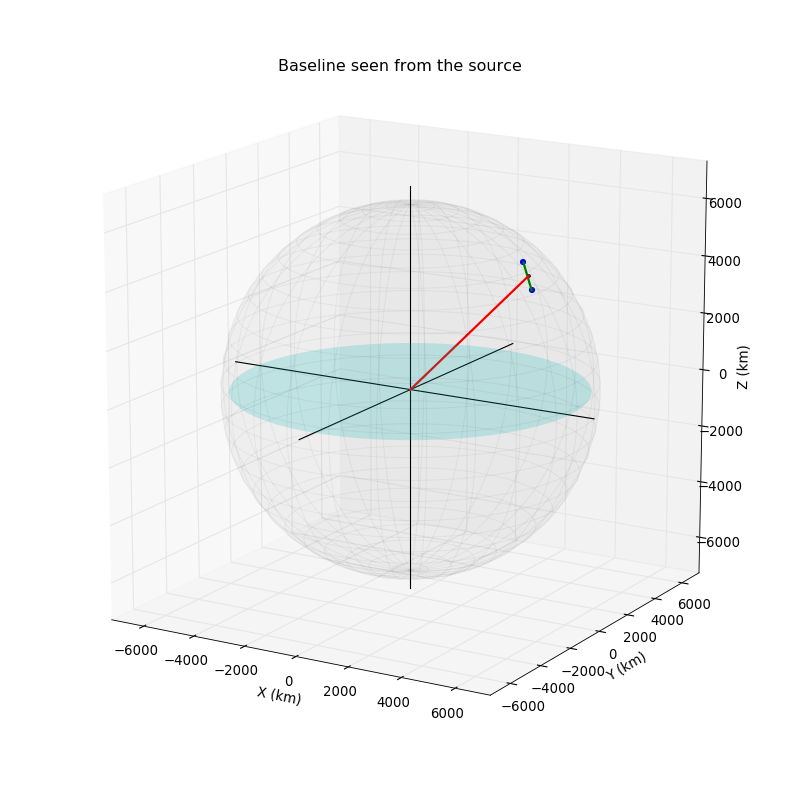

In [8]:
%matplotlib nbagg
plotBL.sphere(ant1,ant2,A,E,D,L)

**Figure 4.4.1**: A baseline located at +45$^\circ$ as seen from the sky. This plot is interactive and can be rotated in 3D to see different baseline projection, depending on the position of the source w.r.t. the physical baseline.

On the previous interactive plot, we represented a baseline located at +45$^\circ$, locally aligned with the south-west/north-east as seen from the celestial sphere. By rotating the sphere westward, you can simulate the variation of the baseline projection as seen from a source in apparent motion on the celestial sphere.

##### Coordinates of the baseline in the ($u$,$v$,$w$) plane

We will now simulate an observation to study how a projected baseline will change with time. We located this baseline in South African latitude. We first need the expression of the physical baseline in a convenient reference frame attached with the source in the sky.

In [$\S$ 4.1 &#10142;](4_1_The_Baseline.ipynb), we linked the equatorial coordinates of the baseline to the ($u$,$v$,$w$) space through the transformation matrix:
\begin{equation}
\begin{pmatrix}
u\\
v\\
w
\end{pmatrix}
=
\frac{1}{\lambda}
\begin{pmatrix}
\sin H_0 & \cos H_0 & 0\\ 
-\sin \delta_0 \cos H_0 & \sin\delta_0\sin H_0 & \cos\delta_0\\
\cos \delta_0 \cos H_0 & -\cos\delta_0\sin H_0 & \sin\delta_0\\
\end{pmatrix} 
\begin{pmatrix}
X\\
Y\\
Z
\end{pmatrix}
\end{equation}

<a id="eq:441"></a>
\begin{equation}
\begin{bmatrix}
X\\
Y\\
Z
\end{bmatrix}
=|\mathbf{b}|
\begin{bmatrix}
\cos L_a \sin \mathcal{E} - \sin L_a \cos \mathcal{E} \cos \mathcal{A}\nonumber\\ 
\cos \mathcal{E} \sin \mathcal{A} \nonumber\\
\sin L_a \sin \mathcal{E} + \cos L_a \cos \mathcal{E} \cos \mathcal{A}\\
\end{bmatrix}
\end{equation}


This expression of $\mathcal{b}$ is a function of ($\mathcal{A}$,$\mathcal{E}$) in the equatorial ($X$,$Y$,$Z$) systems. 

##### Observation parameters

Let's define an arbitrary set of observation parameters to mimic an real observation.

* Latitude of the baseline: $L_a=-30^\circ43'17.34''$
* Declination of the observation: $\delta=-74^\circ39'37.481''$
* Duration of the observation: $\Delta \text{HA}=[-4^\text{h},4^\text{h}]$
* Time steps: 600
* Frequency: 1420 MHz

In [9]:
# Observation parameters
c=3e8                                          # Speed of light
f=1420e9                                       # Frequency
lam = c/f                                      # Wavelength 
#dec = (np.pi/180)*(-74-39.0/60-37.481/3600)   # Declination
dec = (np.pi/180)*(-30-43.0/60-17.34/3600)     # Declination

time_steps = 600                               # time steps
h = np.linspace(-4,4,num=time_steps)*np.pi/12  # Hour angle window

##### Computation of the projected baselines in ($u$,$v$,$w$) coordinates along time

As seen previously, we convert the baseline coordinates using the previous matrix transformation.

In [10]:
ant1 = np.array([25.095,-9.095,0.045])
ant2 = np.array([90.284,26.380,-0.226])
b_ENU = ant2-ant1
D = np.sqrt(np.sum((b_ENU)**2))
L = (np.pi/180)*(-30-43.0/60-17.34/3600)

A=np.arctan2(b_ENU[0],b_ENU[1])
print "Azimuth=",A*(180/np.pi)
E=np.arcsin(b_ENU[2]/D)
print "Elevation=",E*(180/np.pi)

X = D*(np.cos(L)*np.sin(E)-np.sin(L)*np.cos(E)*np.cos(A))
Y = D*np.cos(E)*np.sin(A)
Z = D*(np.sin(L)*np.sin(E)+np.cos(L)*np.cos(E)*np.cos(A))

Azimuth= 61.4455465958
Elevation= -0.209213555573


As the $u$, $v$, $w$ coordinates depend explicitely on $H$, we must evaluate them for each time step of the observation. We will use the equations defined in [$\S$ 4.1.2 &#10142;](4_1_The_Baseline.ipynb):

* $\lambda u = X \sin H + Y \cos H$
* $\lambda v= -X \sin \delta \cos H + Y \sin\delta\sin H + Z \cos\delta$
* $\lambda w= X \cos \delta \cos H -Y \cos\delta\sin H + Z \sin\delta$

In [11]:
u = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)/1e3
v = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)/1e3
w = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)/1e3

We have now everything that describe the $uvw$-track of the baseline over an 8-hour observation period. Under this form, it is for the moment quite unclear which shape the $uvw$ track takes. Let's plot it on the $uvw$ space and its protection $uv$ space.

<IPython.core.display.Javascript object>


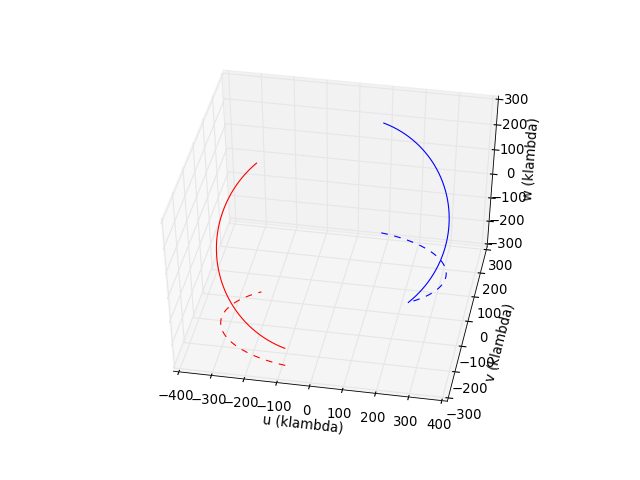

In [12]:
%matplotlib nbagg
plotBL.UV(u,v,w)

**Figure 4.4.2**: $uvw$ track derived from the simulation and projection in the $uv$-plane.

The track in the $uvw$ space are curves and the projection in the $uv$ plane are arcs. Let's focus more on the projection of the track in this plane. To get an observation-independent knowledge of the track, we can try to combine the three equations of $u$, $v$ and $w$ with the objective of eliminating $H$ from the equation. We end up an equation linking $u$, $v$, $X$ and $Y$ (the full derivation can be found in [$\S$ A.3 &#10142;](../0_Introduction/2_Appendix.ipynb)):

$$\boxed{u^2 + \left[ \frac{v -\frac{Z}{\lambda} \cos \delta}{\sin \delta} \right]^2 = \left[ \frac{X}{\lambda} \right]^2 + \left[ \frac{Y}{\lambda} \right]^2}$$

One can note that in this particular case, the $uv$ tracks is described by the equation of an ellipsis.

This ellipsis is centered at $(0,\frac{Z}{\lambda} \cos \delta)$ in the ($u$,$v$) plane.

The major axis of  $a=\frac{\sqrt{X^2 + Y^2}}{\lambda}$.

The minor axis along the axis $v$ will be a function of $Z$, $\delta$ and $a$.
To verify this fact, let's plot the theoretical ellipsis over the observed portion of the track. (You can fall back to the duration of the observation to see that the track is mapping exactly the ellipsis).

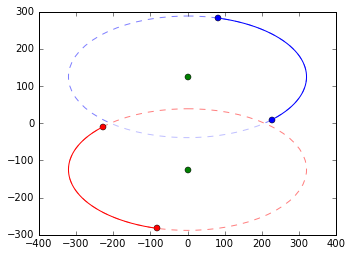

In [13]:
%matplotlib inline
from matplotlib.patches import Ellipse

# parameters of the UVtrack as an ellipse
a=np.sqrt(X**2+Y**2)/lam/1e3 # major axis  
b=a*np.sin(dec)              # minor axis
v0=Z/lam*np.cos(dec)/1e3     # center of ellipse

plotBL.UVellipse(u,v,w,a,b,v0)

**Figure 4.4.3**: The blue (resp. the red) curve is the $uv$ track of the baseline $\mathbf{b}_{12}$ (resp. $\mathbf{b}_{21}$). As $I_\nu$ is real, the real part of the visibility $\mathcal{V}$ is even and the imaginary part if odd making $\mathcal{V}(-u,-v)=\mathcal{V}^*$. It implies that one baseline provide a measurement of its complex conjugate for free at ($-u$,$-v$).

### 4.4.1.B Special cases

##### The Polar interferometer

Let settle one baseline at the North pole. The local zenith corresponds to the North Celestial Pole at $\delta=90^\circ$. As seen from the NCP, the baseline will rotate and the projected baseline will correspond to the physical baseline. This is the only case where it is happening.

If $\mathbf{b}$ rotates, we can guess that the $uv$ tracks will be perfect circles. Let's verify that.

In [14]:
L=np.radians(90.)
ant1 = np.array([25.095,-9.095,0.045])
ant2 = np.array([90.284,26.380,-0.226])
b_ENU = ant2-ant1
D = np.sqrt(np.sum((b_ENU)**2))

A=np.arctan2(b_ENU[0],b_ENU[1])
print "Azimuth=",A*(180/np.pi)
E=np.arcsin(b_ENU[2]/D)
print "Elevation=",E*(180/np.pi)

X = D*(np.cos(L)*np.sin(E)-np.sin(L)*np.cos(E)*np.cos(A))
Y = D*np.cos(E)*np.sin(A)
Z = D*(np.sin(L)*np.sin(E)+np.cos(L)*np.cos(E)*np.cos(A))

Azimuth= 61.4455465958
Elevation= -0.209213555573


Let's compute the $uv$ tracks when observing the NCP ($\delta=90^\circ$):

In [15]:
dec=np.radians(90.)

uNCP = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)/1e3
vNCP = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)/1e3
wNCP = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)/1e3

# parameters of the UVtrack as an ellipse
aNCP=np.sqrt(X**2+Y**2)/lam/1e3 # major axis  
bNCP=aNCP*np.sin(dec)              # minor axi
v0NCP=Z/lam*np.cos(dec)/1e3     # center of ellipse

Let's compute the uv tracks when observing a source at $\delta=30^\circ$:

In [16]:
dec=np.radians(30.)

u30 = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)/1e3
v30 = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)/1e3
w30 = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)/1e3

a30=np.sqrt(X**2+Y**2)/lam/1e3 # major axis  
b30=a*np.sin(dec)              # minor axi
v030=Z/lam*np.cos(dec)/1e3     # center of ellipse

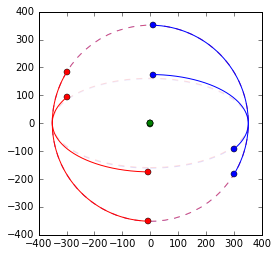

In [17]:
%matplotlib inline
plotBL.UVellipse(u30,v30,w30,a30,b30,v030)
plotBL.UVellipse(uNCP,vNCP,wNCP,aNCP,bNCP,v0NCP)

**Figure 4.4.4**: $uv$ track for a baseline at the pole observing at $\delta=90^\circ$ (NCP) and at $\delta=30^\circ$ with the same color conventions as the previous figure.

When observing a source at declination $\delta$, we still have an elliptical shape but centered at (0,0). In the case of a polar interferometer, the full $uv$ track can be covered in 12 hours only due to the symmetry of the baseline.

##### The Equatorial interferometer

This time, we position the interferometer at the equator. The local zenith is crossed by the Celestial Equator at $\delta=0^\circ$. As seen from the celestial equator, the baseline will not rotate and the projected baseline will no longer correspond to the physical baseline. This is the only case where it is happening.

If $\mathbf{b}$ is not rotating, we can guess that the $uv$ tracks will be perfect lines.

In [18]:
L=np.radians(90.)
X = D*(np.cos(L)*np.sin(E)-np.sin(L)*np.cos(E)*np.cos(A))
Y = D*np.cos(E)*np.sin(A)
Z = D*(np.sin(L)*np.sin(E)+np.cos(L)*np.cos(E)*np.cos(A))


# At local zenith == Celestial Equator
dec=np.radians(0.)

uEQ = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)/1e3
vEQ = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)/1e3
wEQ = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)/1e3

# parameters of the UVtrack as an ellipse
aEQ=np.sqrt(X**2+Y**2)/lam/1e3 # major axis  
bEQ=aEQ*np.sin(dec)              # minor axi
v0EQ=Z/lam*np.cos(dec)/1e3     # center of ellipse

# Close to Zenith
dec=np.radians(10.)

u10 = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)/1e3
v10 = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)/1e3
w10 = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)/1e3

a10=np.sqrt(X**2+Y**2)/lam/1e3 # major axis  
b10=a*np.sin(dec)              # minor axi
v010=Z/lam*np.cos(dec)/1e3     # center of ellipse

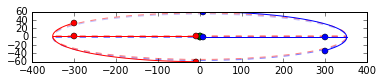

In [21]:
%matplotlib inline
plotBL.UVellipse(u10,v10,w10,a10,b10,v010)
plotBL.UVellipse(uEQ,vEQ,wEQ,aEQ,bEQ,v0EQ)

**Figure 4.4.5**: $uv$ track for a baseline at the equator observing at $\delta=0^\circ$ and at $\delta=10^\circ$ with the same color convention as the previous figure.

An equatorial interferometer observing at zenith will see radio sources crossing the sky on straight line paths. Therefore, they will produce straight $uv$ coordinates.

##### The East-West array <a id='vis:sec:ew'></a> <!--\label{vis:sec:ew}-->

The East-West array is a specific case of interferometer where the physical baseline is aligned with the ground East-West direction. They provide the property of giving a $uv$ coverage fully included on a plane.

If the baseline is aligned with the East-West direction, then the Elevation $\mathcal{E}$ of the baseline is zero and the Azimuth $\mathcal{A}$ is $\frac{\pi}{2}$. Equation [1](#eq:441) then simplifies as follow:

Only the $Y$ component of the baseline will be non zero.

\begin{equation}
\frac{1}{\lambda}
\begin{bmatrix}
X\\
Y\\
Z
\end{bmatrix}
=
|\mathbf{b_\lambda}|
\begin{bmatrix}
\cos L_a \sin 0 - \sin L_a \cos 0 \cos \frac{\pi}{2}\nonumber\\ 
\cos 0 \sin \frac{\pi}{2} \nonumber\\
\sin L_a \sin 0 + \cos L_a \cos 0 \cos \frac{\pi}{2}\\
\end{bmatrix}
=
\begin{bmatrix}
0\\
|\mathbf{b_\lambda}|\\
0 \\
\end{bmatrix}
\end{equation}

If we observe a source at declination $\delta_0$ but with varying Hour Angle, $H$, we will have the following relation:

\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
\sin H & \cos H & 0\\ 
-\sin \delta_0 \cos H & \sin\delta_0\sin H & \cos\delta_0\\
\cos \delta_0 \cos H & -\cos\delta_0\sin H & \sin\delta_0\\
\end{pmatrix} 
\begin{pmatrix}
0\\
|\mathbf{b_\lambda}| \\
0
\end{pmatrix}
\end{equation}

\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
|\mathbf{b_\lambda}| \cos H \\ 
|\mathbf{b_\lambda}| \sin\delta_0 \sin H\\
-|\mathbf{b_\lambda}|\cos\delta_0\sin H\\
\end{pmatrix} 
\end{equation}

when $H = 6^\text{h}$ (West)

\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 
|\mathbf{b_\lambda}|\sin\delta_0\\
|\mathbf{b_\lambda}|\cos\delta_0\\
\end{pmatrix} 
\end{equation}

when $H = 0^\text{h}$ (South)
\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
|\mathbf{b_\lambda}| \\ 
0\\
0\\
\end{pmatrix} 
\end{equation}

when $H = -6^\text{h}$ (East)

\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 
-|\mathbf{b_\lambda}|\sin\delta_0\\
-|\mathbf{b_\lambda}|\cos\delta_0
\end{pmatrix} 
\end{equation}

In this case, one can notice that we always have a relationship between $u$, $v$ and $|\mathbf{b_\lambda}|$:

$$ u^2+\left( \frac{v}{\sin\delta_0}\right) ^2=|\mathbf{b_\lambda}|^2$$ 

<div class=warn>
**Warning:** The $\sin\delta_0$ factor, appearing in the previous equation, can be interpreted as a compression factor.
</div>

### 4.4.1.C Sampling the visibility plane with UV tracks

##### Simulating a baseline

When we have an EW baseline, some equations simplify.

First, $XYZ = [0~d~0]^T$, where $d$ is the baseline length measured in wavelengths.

Second, we have the following relationships: $u = d\cos(H)$, $v = d\sin(H)\sin(\delta)$,

where $H$ is the hour angle of the field center and $\delta$ its declination.

In this section we will be plotting the $uv$-coverage of an EW-baseline whose field center is at two different declinations.

In [22]:
H = np.linspace(-6,6,600)*(np.pi/12) #Hour angle in radians
d = 100 #We assume that we have already divided by wavelength

delta = 60*(np.pi/180) #Declination in degrees
u_60 = d*np.cos(H)
v_60 = d*np.sin(H)*np.sin(delta)

##### Simulating a sky

Here we have a three sources given in RA ($\alpha$) and DEC ($\delta$):
* Source 1: (5h 32m 0.4s,60$^{\circ}$-17' 57'') - 1 Jy
* Source 2: (5h 36m 12.8s,-61$^{\circ}$ 12' 6.9'') - 0.5 Jy
* Source 3: (5h 40m 45.5s,-61$^{\circ}$ 56' 34'') - 0.2 Jy

We place the field center at $(\alpha_0,\delta_0) = $ (5h 30m,60$^{\circ}$).  

In [23]:
RA_sources = np.array([5+30.0/60,5+32.0/60+0.4/3600,5+36.0/60+12.8/3600,5+40.0/60+45.5/3600])
DEC_sources = np.array([60,60+17.0/60+57.0/3600,61+12.0/60+6.9/3600,61+56.0/60+34.0/3600])
Flux_sources_labels = np.array(["","1 Jy","0.5 Jy","0.2 Jy"])
Flux_sources = np.array([1,0.5,0.1]) #in Jy
step_size = 200
print "Phase center     Source 1     Source 2     Source3"
print repr("RA="+str(RA_sources)).ljust(2)
print "DEC="+str(DEC_sources)

Phase center     Source 1     Source 2     Source3
'RA=[ 5.5         5.53344444  5.60355556  5.67930556]'
DEC=[ 60.          60.29916667  61.20191667  61.94277778]


We then convert the ($\alpha$,$\delta$) to $l,m$ with
* $l = \cos \delta \sin \Delta \alpha$
* $m = \sin \delta\cos\delta_0 -\cos \delta\sin\delta_0\cos\Delta \alpha$
* $\Delta \alpha = \alpha - \alpha_0$

In [24]:
RA_rad = np.array(RA_sources)*(np.pi/12)
DEC_rad = np.array(DEC_sources)*(np.pi/180)
RA_delta_rad = RA_rad-RA_rad[0]

l = np.cos(DEC_rad)*np.sin(RA_delta_rad)
m = (np.sin(DEC_rad)*np.cos(DEC_rad[0])-np.cos(DEC_rad)*np.sin(DEC_rad[0])*np.cos(RA_delta_rad))
print "l=",l*(180/np.pi)
print "m=",m*(180/np.pi)

point_sources = np.zeros((len(RA_sources)-1,3))
point_sources[:,0] = Flux_sources
point_sources[:,1] = l[1:]
point_sources[:,2] = m[1:]

l= [ 0.          0.24855826  0.74818685  1.26458942]
m= [ 0.          0.30010768  1.21061225  1.96811494]


The coordinates of the sources and the phase center are now in degrees.

/home/user/.virtualenv/fundamentals/local/lib/python2.7/site-packages/matplotlib/text.py:2046: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


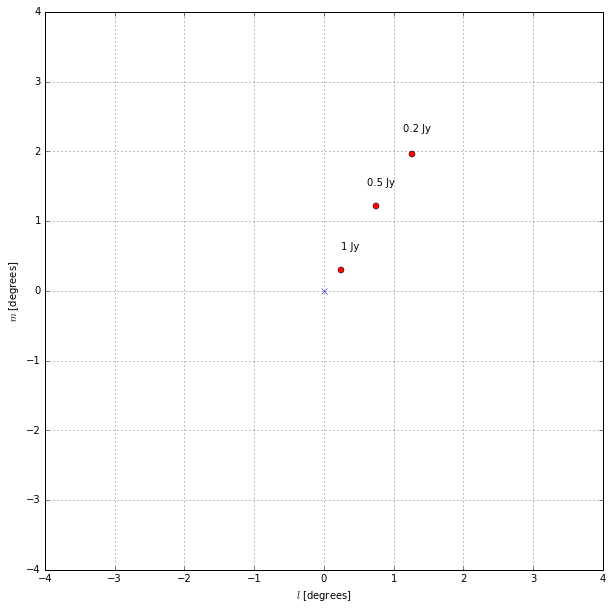

In [25]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel("$l$ [degrees]")
plt.ylabel("$m$ [degrees]")
plt.plot(l[0],m[0],"bx")
plt.hold("on")
plt.plot(l[1:]*(180/np.pi),m[1:]*(180/np.pi),"ro") 
counter = 1
for xy in zip(l[1:]*(180/np.pi)+0.25, m[1:]*(180/np.pi)+0.25):                                              
    ax.annotate(Flux_sources_labels[counter], xy=xy, textcoords='offset points',horizontalalignment='right',
                verticalalignment='bottom')  
    counter = counter + 1
        
plt.grid()

**Figure 4.4.6**: Distribution of the simulated sky in the $l$,$m$ plane.

##### Simulating an observation

We will now be creating a completely filled in $uv$-plane and sample it on the EW-baseline track we created in the first section. We will be ignoring the $w$-term for the sake of simplicity.

In [26]:
u = np.linspace(-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10, num=step_size, endpoint=True)
v = np.linspace(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10, num=step_size, endpoint=True)   
uu, vv = np.meshgrid(u, v)
zz = np.zeros(uu.shape).astype(complex)

We create the dimensions of our visibility plane.

In [27]:
s = point_sources.shape
for counter in xrange(1, s[0]+1):
    A_i = point_sources[counter-1,0]
    l_i = point_sources[counter-1,1]
    m_i = point_sources[counter-1,2]
    zz += A_i*np.exp(-2*np.pi*1j*(uu*l_i+vv*m_i))
zz = zz[:,::-1]

We create our completely filled in visibitly plane. If we had a perfect interferometer we could sample the entire $uv$-plane, but due to the fact that we only have a finite amount of antennas this is not possible. Recall that our sky brightness $I(l,m)$ is related to to our visibilites $V(u,v)$ via the Fourier transform. For a bunch of point sources we can therefore write:

$$V(u,v)=\mathcal{F}\{I(l,m)\} = \mathcal{F}\{\sum_k A_k \delta(l-l_k,m-m_k)\} = \sum_k A_k e^{-2\pi i (ul_i+vm_i)}$$

Let's compute the total visibilities for all sources.

In [28]:
u_track = u_60
v_track = v_60
z = np.zeros(u_track.shape).astype(complex)       

s = point_sources.shape
for counter in xrange(1, s[0]+1):
    A_i = point_sources[counter-1,0]
    l_i = point_sources[counter-1,1]
    m_i = point_sources[counter-1,2]
    z += A_i*np.exp(-1*2*np.pi*1j*(u_track*l_i+v_track*m_i))

Below we sample our visibility plane on the $uv$-track derived in the first section, i.e. $V(u_t,v_t)$.

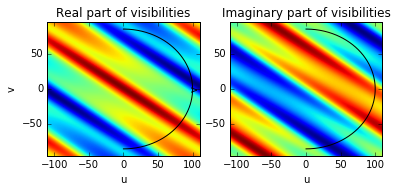

In [29]:
plt.subplot(121)
plt.imshow(zz.real,extent=[-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10,-1*(np.amax(abs(v_60)))-10, \
                           np.amax(abs(v_60))+10])
plt.plot(u_60,v_60,"k")
plt.xlim([-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10])
plt.ylim(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10)
plt.xlabel("u")
plt.ylabel("v")
plt.title("Real part of visibilities")

plt.subplot(122)
plt.imshow(zz.imag,extent=[-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10,-1*(np.amax(abs(v_60)))-10, \
                           np.amax(abs(v_60))+10])
plt.plot(u_60,v_60,"k")
plt.xlim([-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10])
plt.ylim(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10)
plt.xlabel("u")
plt.ylabel("v")
plt.title("Imaginary part of visibilities")

**Figure 4.4.7**: Real and imaginary part of the visibility function. The black curve is the portion of the $uv$ track crossing the visibility.

We now plot the sampled visibilites as a function of time-slots, i.e $V(u_t(t_s),v_t(t_s))$.

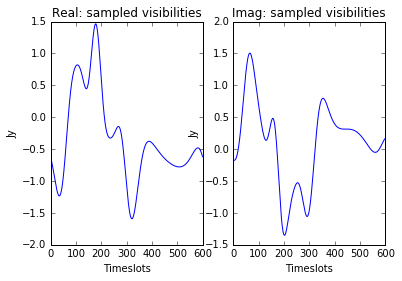

In [30]:
plt.subplot(121)
plt.plot(z.real)
plt.xlabel("Timeslots")
plt.ylabel("Jy")
plt.title("Real: sampled visibilities")

plt.subplot(122)
plt.plot(z.imag)
plt.xlabel("Timeslots")
plt.ylabel("Jy")
plt.title("Imag: sampled visibilities")

**Figure 4.4.8**: Real and imaginary part of the sampled visibility (by the black curve in Fig. 4.4.7) as a function of time.

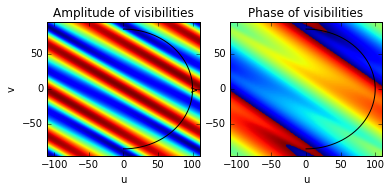

In [31]:
plt.subplot(121)
plt.imshow(abs(zz),
    extent=[-1*(np.amax(np.abs(u_60)))-10,
            np.amax(np.abs(u_60))+10,
            -1*(np.amax(abs(v_60)))-10,
            np.amax(abs(v_60))+10])
plt.plot(u_60,v_60,"k")
plt.xlim([-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10])
plt.ylim(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10)
plt.xlabel("u")
plt.ylabel("v")
plt.title("Amplitude of visibilities")

plt.subplot(122)
plt.imshow(np.angle(zz),
    extent=[-1*(np.amax(np.abs(u_60)))-10,
            np.amax(np.abs(u_60))+10,
            -1*(np.amax(abs(v_60)))-10,
            np.amax(abs(v_60))+10])
plt.plot(u_60,v_60,"k")
plt.xlim([-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10])
plt.ylim(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10)
plt.xlabel("u")
plt.ylabel("v")
plt.title("Phase of visibilities")

**Figure 4.4.9**: Amplitude and Phase of the visibility function. The black curve is the portion of the $uv$ track crossing the visibility.

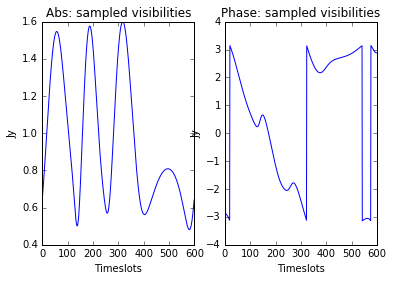

In [32]:
plt.subplot(121)
plt.plot(abs(z))
plt.xlabel("Timeslots")
plt.ylabel("Jy")
plt.title("Abs: sampled visibilities")

plt.subplot(122)
plt.plot(np.angle(z))
plt.xlabel("Timeslots")
plt.ylabel("Jy")
plt.title("Phase: sampled visibilities")

**Figure 4.4.10**: Amplitude and Phase of the sampled visibility (by the black curve in Fig. 4.4.7) as a function of time.

##### "Real-life" visibility

In the following figure, we present a collection of visibility measurements taken with different baselines, as a function of time. These measurements come from a real LOFAR dataset observing Cygnus A (Fig. [4.4.11 &#10549;](#fig:4411)), a powerful radiosource.
Each color corresponds to a different baseline measurement, and consequently, a different sampling of the same visibility function along different uv-track.

<a id="fig:4411"></a>
<img src='figures/cygnusA.jpg' width=30%>

**Figure 4.4.11**: The source Cygnus A at 21 cm.

<a id="fig:4412"></a>
<img src='figures/baselines.jpg' width=70%>

**Figure 4.4.12**: Visibility amplitude as a function of time.

Fig. [4.4.12 &#10549;](#fig:4412) displays the collection of all sampled visibility amplitudes as a function of time from the observation of Cygnus A. The large number of antennas make the interpretation of the plots difficult. Even the inspection of single $uv$ track visibility amplitude is hard to comprehend due to the intrinsic complexity of the source. Let's plot the same information as a function of the $uv$-distance $r_{uv}$.

<a id="fig:4413"></a>
<img src='figures/baseline-uvdist.jpg' width=70%>

**Figure 4.4.13**: Visibility amplitude as a function of $r_{uv}$.

Fig. [4.4.13 &#10549;](#fig:4413) display the same information as Fig. [4.4.12 &#10549;](#fig:4412) but as a function of $r_{uv}$. Under this form, it should be quite clear that, as in [$\S$ 4.3 &#10142;](4_3_The_Visibility_Function.ipynb), we have a stacking of the radial plots of the visibility function. The interpretation of those radial plots inform us about the shape of the source. In particular, when the amplitude of the visibility goes to zero, one characteristic size of the source has been resolved.

From these plots, it is clear that the larger number of different baselines we have, the more complete is the sampling of the visibility function.
How to enrich the $uv$ coverage is the topic of the next section.

<p class=conclusion>
  <font size=4> **Important things to remember**</font>
  <br>
  <br>

&bull; One baseline samples the visibility function along one $uv$ track.<br>
&bull; The $uv$ tracks are ellipses which parameters depends on the latitude, declination of observation.<br>
&bull; The polar (resp. equatorial) interferometer gives circular (linear) $uv$ tracks.<br>
&bull; The accumulation of samples accross time enhance the sampling of the visibility function, and therefore improves the knowledge of the source.<br>

</p>

***

* Next: [4.4.2 UV Coverage: Improving Your Coverage](4_4_2_UV_Coverage_Improving_Your_Coverage.ipynb)

<div class=warn><b>Future Additions:</b></div>